In [6]:
#To register MainEnvRL with local copy of Gym
"""
from gym.envs.registration import register
 
register(
    id='MainEnvRL-v0',
    #entry_point='balance_bot.envs:BalancebotEnv',
    entry_point='MainEnv_RL.envs:MainEnvRL',
)
"""


Ep: 159 Reward: -0.15759959708775237 Target: (0.715, 0.045, 0.95)  Final Position:  [0.7113179090092302, 0.04657048907580807, 0.95]


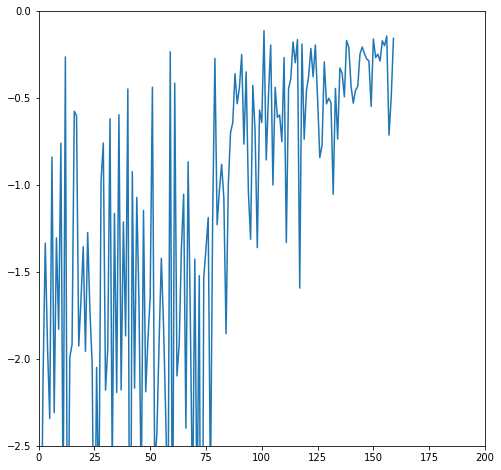

In [ ]:
#https://github.com/ZhizhenQin/BalancingBot/blob/master/balance-bot/balance_bot/balancebot_task.py


import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
import tensorflow as tf
import tensorflow.contrib.layers as layers
import gym
from baselines import deepq, ddpg
#import balance_bot
import MainEnv_RL




def callback(lcl, glb):
    # stop training if reward exceeds 199
    is_solved = lcl['t'] > 100 and sum(lcl['episode_rewards'][-101:-1]) / 100 >= 199
    
    return is_solved

def main():
    # create the environment
    env = gym.make("MainEnvRL-v0") # <-- this we need to create
    #env = gym.make("CartPole-v0")
    # create the leaarning agent
    #model = mlp([16, 16])  q_func=model,

    # train the agent on the environment
    
    """
    #default
    act = deepq.learn(
        env, network= 'mlp',  lr=1e-3,
        total_timesteps=50000, buffer_size=50000, exploration_fraction=0.1,
        exploration_final_eps=0.02, print_freq=100, callback=callback
    )
    """
    
    act = deepq.learn(
        env, network= 'mlp',  lr=1e-3,
        total_timesteps=50000, buffer_size=50000, exploration_fraction=0.1,prioritized_replay=True,
        exploration_final_eps=0.02, print_freq=100, callback=callback
    )

    #default total_timesteps=200000
    
    # save trained model
    act.save("balance.pkl")

if __name__ == '__main__':
    main()